In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [63]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [64]:
ride_data = pd.DataFrame(ride_data)
ride_data.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789


In [152]:
city_data = pd.DataFrame(city_data)
city_data.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [154]:
# Combine the data into a single dataset
df = pd.merge(ride_data, city_data, on='city', how='left')
df = df.groupby(['city', "type"])
df = pd.DataFrame(round(df.mean()))
df = df.reset_index()
df.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,25.0,5.359336e+12,12.0
1,Barajasview,Urban,25.0,4.676968e+12,26.0
2,Barronchester,Suburban,36.0,4.460796e+12,11.0
3,Bethanyland,Suburban,33.0,5.842550e+12,22.0
4,Bradshawfurt,Rural,40.0,3.735294e+12,7.0


In [142]:
# Display the data table for preview
df.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,25.0,5.359336e+12,12.0
1,Barajasview,Urban,25.0,4.676968e+12,26.0
2,Barronchester,Suburban,36.0,4.460796e+12,11.0
3,Bethanyland,Suburban,33.0,5.842550e+12,22.0
4,Bradshawfurt,Rural,40.0,3.735294e+12,7.0


In [155]:
total_count = ride_data.copy()

total_count = total_count.groupby('city')['ride_id'].count()
total_count = pd.DataFrame(city_count)

total_count = total_count.reset_index()
total_count = total_count.rename(columns={'ride_id': 'Total number of rides'})
total_count.head()

,index,city,Total number of rides
0,0,Amandaburgh,18
1,1,Barajasview,22
2,2,Barronchester,16
3,3,Bethanyland,18
4,4,Bradshawfurt,10


In [156]:
df = pd.merge(df, total_count, on='city')

df = df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare']]

df = pd.DataFrame(df)

## Bubble Plot of Ride Sharing Data

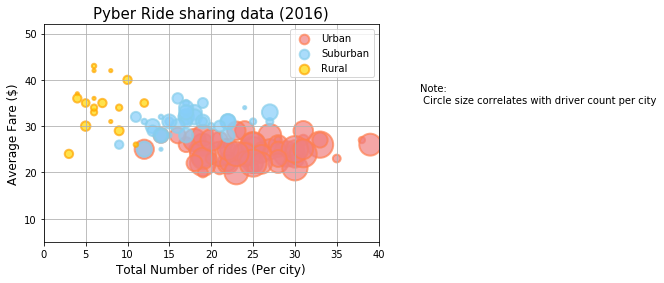

In [157]:
# Obtain the x and y coordinates for each of the three city types

u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')

# Build the scatter plots for each city types

x = (df['Total number of rides'] * u)
y = (df['fare'] * u)

plt.scatter(x, y, alpha=0.7, c='lightcoral', edgecolors='coral', s = df['driver_count']*10, label="Urban", linewidths=2)


x = (df['Total number of rides'] * s)
y = (df['fare'] * s)

plt.scatter(x, y, alpha=0.7, c='lightskyblue', edgecolors='skyblue', s = df['driver_count']*10, label='Suburban', linewidths=2)

x = (df['Total number of rides'] * r)
y = (df['fare'] * r)

plt.scatter(x, y, alpha=0.7, c='gold', edgecolors='orange', s = df['driver_count']*10, label='Rural', linewidths=2)

# Incorporate the other graph properties

plt.ylim(5, 52)
plt.xlim(0, 40)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.xlabel('Total Number of rides (Per city)', fontsize = 12)
plt.title("Pyber Ride sharing data (2016)", fontsize = 15)
plt.grid()

# Create a legend

plt.legend(loc="upper right", scatterpoints=1, fontsize=10, markerscale=0.5)
note = ("Note:\n Circle size correlates with driver count per city")

# Incorporate a text label regarding circle size
plt.text(45,35,note)
plt.show()



## Total Fares by City Type

In [158]:
# Calculate Type Percents
df1 = pd.merge(city_data,ride_data, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1 ['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
df1
# Save Figure


,type,fare,% of total fare
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


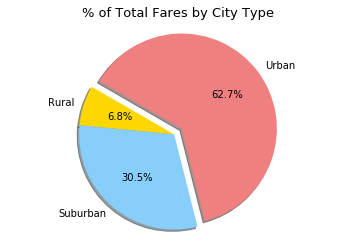

In [159]:
# Build Pie Chart

areas = df1['type']
full_fare = df1['% of total fare']
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0,0,0.10)
plt.pie(full_fare, explode=explode, labels=areas, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% of Total Fares by City Type', fontsize=13)
plt.axis("equal")
plt.show()

## Total Rides by City Type

In [160]:
df2 = df.groupby('type')['Total number of rides'].sum()

df2 = pd.DataFrame(df2)

df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
df2

,type,Total number of rides,% of total rides
0,Rural,125,5.263158
1,Suburban,625,26.315789
2,Urban,1625,68.421053


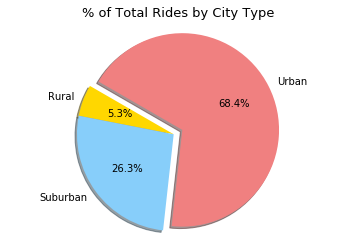

In [161]:
# Calculate Ride Percents

areas = df2['type']
full_rides = df2['% of total rides']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.10)
plt.pie(full_rides, explode=explode, labels=areas, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Build Pie Chart
plt.title('% of Total Rides by City Type', fontsize=13)
plt.axis("equal")
plt.show()
# Save Figure


## Total Drivers by City Type

In [162]:
df3 = df.groupby('type')['driver_count'].sum()

df3 = pd.DataFrame(df3)

df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
df3

,type,driver_count,% of total drivers
0,Rural,78.0,2.623613
1,Suburban,490.0,16.481668
2,Urban,2405.0,80.894719


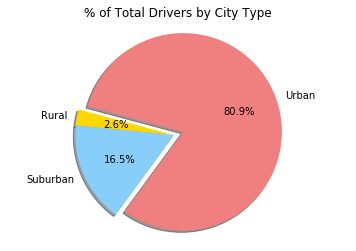

In [163]:
# Calculate Driver Percents

areas = df3['type']
full_drivers = df3['% of total drivers']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.10)
plt.pie(full_drivers, explode=explode, labels=areas, colors=colors, autopct="%1.1f%%", shadow=True, startangle=165)

# Build Pie Charts
plt.title('% of Total Drivers by City Type', fontsize=12)
plt.axis("equal")
plt.show()
# Save Figure
